# Simple linear regression with N inputs and 1 output
Trong ví dụ này, chúng ta sẽ xây dựng một mô hình hồi quy tuyến tính với 2 đầu vào và 1 đầu ra. Đầu vào là 2 biến ngẫu nhiên được sinh ra từ phân phối chuẩn, đầu ra là hàm tuyến tính của 2 biến đầu vào. Chúng ta sẽ sử dụng mô hình này để thực hiện việc dự đoán đầu ra khi biết 2 biến đầu vào.
Đầu ra được tính theo công thức sau:
$$y = 5x_1 + 2x_2 + 20 + \epsilon$$
Trong đó $\epsilon$ là nhiễu được sinh ra từ phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng 1.
Mô hình hồi quy tuyến tính có thể được biểu diễn như sau:   
$$y = w_1x_1 + w_2x_2 + b$$
hay:
$$y = WX^T+ b$$
Trong đó $W$ là vector trọng số, $X$ là vector đầu vào, $b$ là hệ số điều chỉnh.
Sau khi hồi quy, nếu $w_1$ xấp xỉ 5, $x_2$ xấp xỉ 2, b xấp xỉ 20 thì nghĩa là mô hình đã được huấn luyện tốt.

Để huấn luyện mô hình, ta dùng hàm mất mát MSE (Mean Squared Error) và thuật toán tối ưu hóa là Gradient Descent. (Xem phần 1 input & 1 output)

In [1]:
# Import necessary modules
import numpy as np

In [20]:
N_OBSERVATIONS = 100
N_FEATURES = 2
# Generate random data for N input features
X = np.random.rand(N_OBSERVATIONS, N_FEATURES)
print(X.shape)
print(X[:4])
W0 = np.array([5., 2.])
b0 = 20.
targets = np.dot(X, W0) + b0
print(targets.shape)
# Generate random output using uniform distribution
Y = np.dot(X, W0) + b0 + np.random.uniform(0, 1, size=N_OBSERVATIONS)
print(Y.shape)

(100, 2)
[[0.753759   0.2565817 ]
 [0.06464326 0.74323975]
 [0.56285974 0.84544856]
 [0.81154618 0.91056621]]
(100,)
(100,)


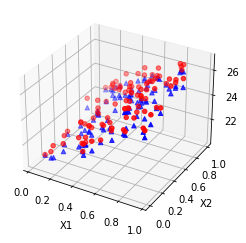

In [21]:
# Plot X, Y and targets in 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], targets, c='b', marker='^')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [40]:
# Initialize weights and bias using uniform distribution
W = np.random.uniform(0, 1, size=N_FEATURES)
b = np.random.uniform(0, 1)
print(W)
print(b)
Y_predict = np.dot(X, W) + b

[0.52740895 0.61748566]
0.9940245100350025


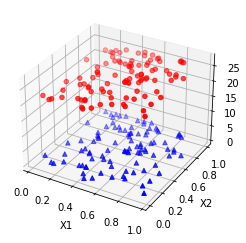

In [36]:
# Plot X, Y and Y_predict in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], Y_predict, c='b', marker='^')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [41]:
# Train the model
LEARNING_RATE = 0.05
EPOCHS = 1000
for epoch in range(EPOCHS):
    Y_predict = np.dot(X, W) + b
    errors = Y_predict - Y
    # calculate the L2-norm of the error vector (loss function)
    l2_norm = np.sum(errors ** 2) / N_OBSERVATIONS
    # Update weights and bias
    W = W - LEARNING_RATE * 2 * np.dot(X.T, errors) / N_OBSERVATIONS
    b = b - LEARNING_RATE * 2 * np.sum(errors) / N_OBSERVATIONS

    # Print the mean squared error every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: MSE = {l2_norm}")


Epoch 0: MSE = 508.03758777633
Epoch 10: MSE = 19.955419000263422
Epoch 20: MSE = 4.088131016700907
Epoch 30: MSE = 3.2310144295509517
Epoch 40: MSE = 2.8896133436403675
Epoch 50: MSE = 2.5997908542678645
Epoch 60: MSE = 2.3426367576911376
Epoch 70: MSE = 2.113874189324998
Epoch 80: MSE = 1.9101466637875635
Epoch 90: MSE = 1.7285249993686276
Epoch 100: MSE = 1.5664408305225137
Epoch 110: MSE = 1.4216402736540443
Epoch 120: MSE = 1.2921439896982552
Epoch 130: MSE = 1.17621244774258
Epoch 140: MSE = 1.0723156930518272
Epoch 150: MSE = 0.979107026227506
Epoch 160: MSE = 0.8954000793688178
Epoch 170: MSE = 0.82014884334265
Epoch 180: MSE = 0.7524302593929626
Epoch 190: MSE = 0.6914290395567799
Epoch 200: MSE = 0.6364244247604101
Epoch 210: MSE = 0.5867786279593957
Epoch 220: MSE = 0.5419267430504113
Epoch 230: MSE = 0.5013679292081601
Epoch 240: MSE = 0.46465770537866447
Epoch 250: MSE = 0.431401211406208
Epoch 260: MSE = 0.4012473111294861
Epoch 270: MSE = 0.3738834291388685
Epoch 280: MS

Text(0.5, 0, 'Y')

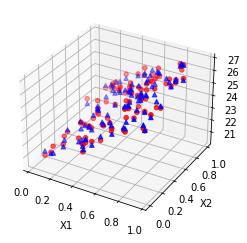

In [42]:
# Plot final predictions
Y_predict = np.dot(X, W) + b
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], Y_predict, c='b', marker='^')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [43]:
print(f"Final MSE = {l2_norm}")
print(f"Final W = {W}")
print(f"Final b = {b}")

Final MSE = 0.08479338548296413
Final W = [5.16752441 1.98344968]
Final b = 20.403065991994563
